# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv('D:/Bootcamp DS/Final Project DS/Case 2/train_house.csv') 
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Drop variabel NaN
house.isnull()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [4]:
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


In [6]:
# Drop variabel NaN
house.dropna(axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [7]:
# Memisahkan data menjadi numerikal & kategorikal
#Memisahkan kolom numerikal
numerical_cols = house.select_dtypes(include=['number'])

#Memisahkan kolom kategorikal
categorical_cols = house.select_dtypes(include=['object', 'category'])

print("Kolom Numerikal:")
print(numerical_cols.head())  # Menampilkan beberapa baris pertama dari kolom numerikal

print("\nKolom Kategorikal:")
print(categorical_cols.head())  # Menampilkan beberapa baris pertama dari kolom kategorikal


Kolom Numerikal:
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  Mo

# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

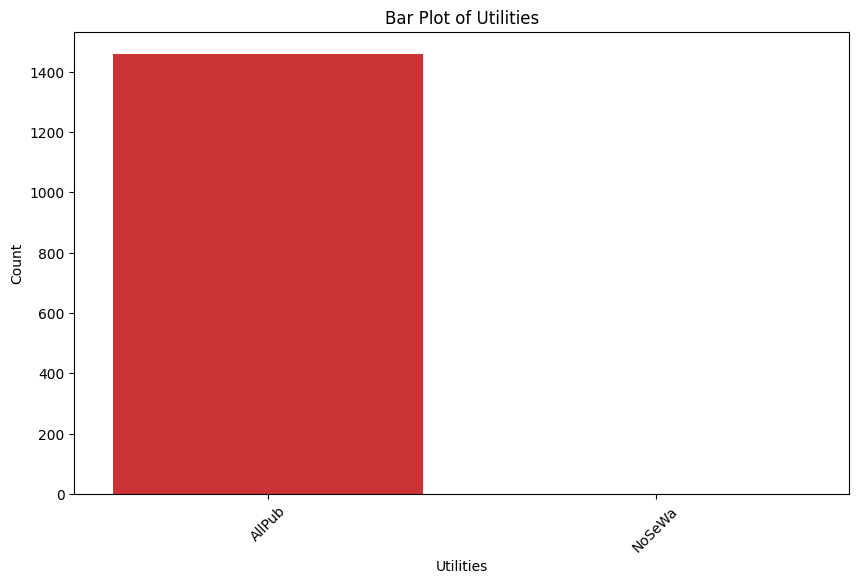

In [8]:
# Barplot untuk variabel 'Utilities'
plt.figure(figsize=(10, 6))  # Ukuran plot: 10x6
sns.countplot(x='Utilities', data=house, palette='Set1')
plt.title('Bar Plot of Utilities')
plt.xlabel('Utilities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

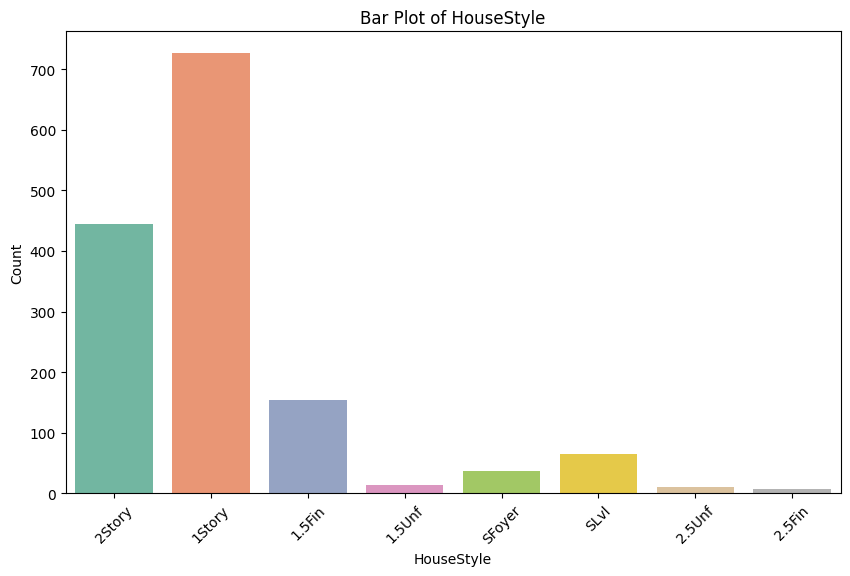

In [9]:
# Barplot untuk variabel 'HouseStyle'
plt.figure(figsize=(10, 6))  # Ukuran plot: 8x6
sns.countplot(x='HouseStyle', data=house, palette='Set2')  
plt.title('Bar Plot of HouseStyle')
plt.xlabel('HouseStyle')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

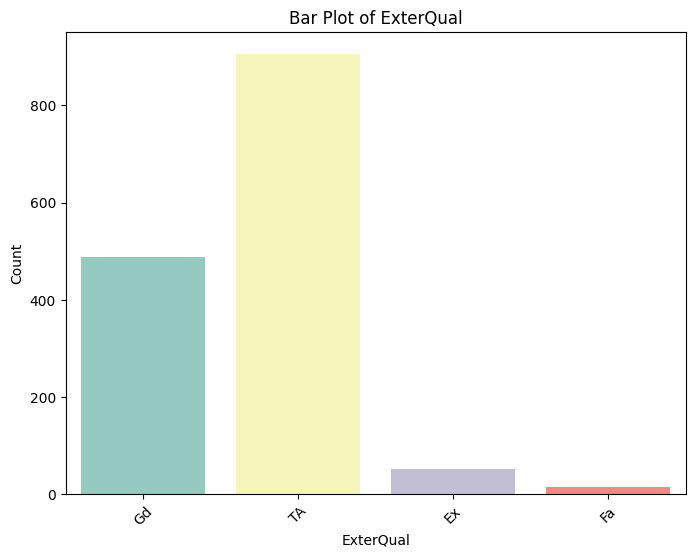

In [10]:
# Barplot untuk variabel 'ExterQual'

plt.figure(figsize=(8, 6))
sns.countplot(x='ExterQual', data=house, palette='Set3')
plt.title('Bar Plot of ExterQual')
plt.xlabel('ExterQual')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [11]:
house['ExterQual'].value_counts()


ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

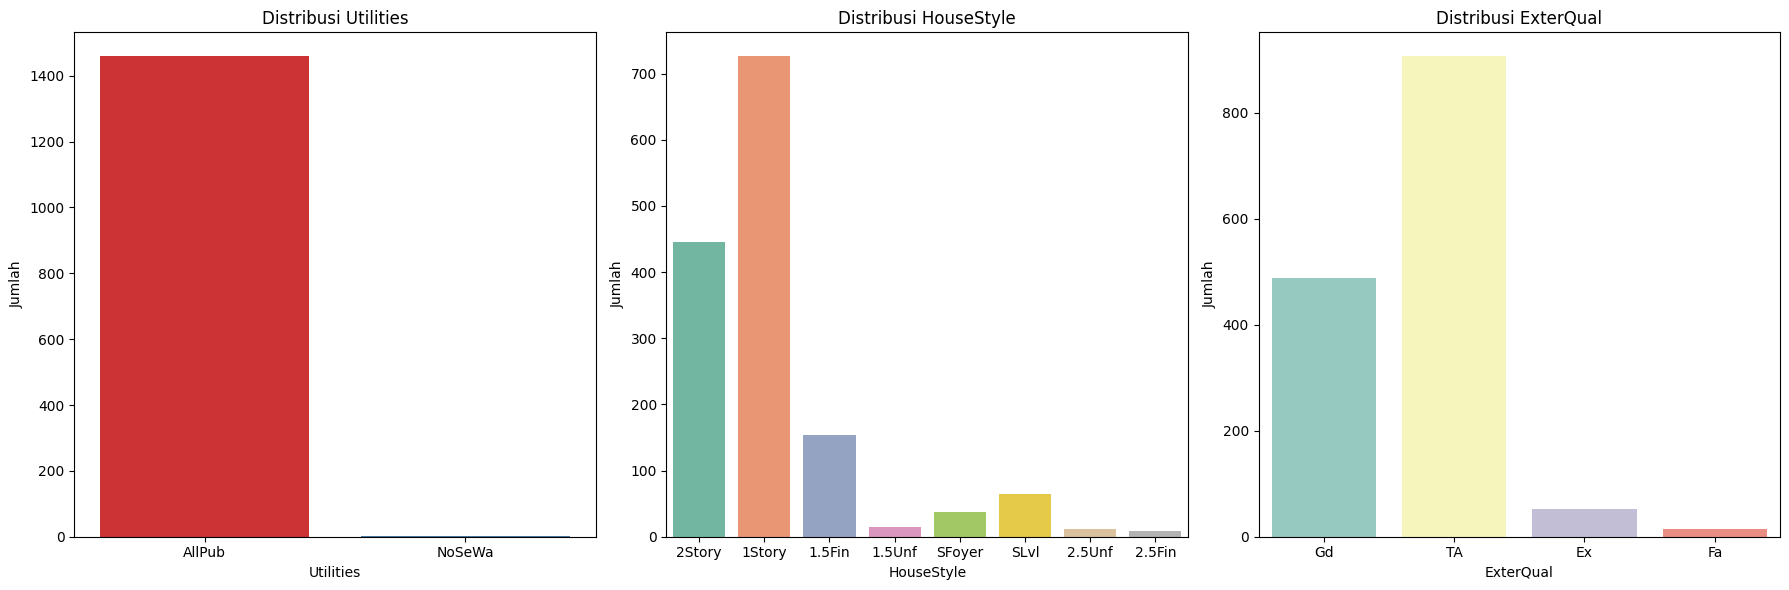

In [11]:
# Buat figure dengan 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Buat bar plot untuk setiap variabel kategorikal
sns.countplot(ax=axes[0], x='Utilities', data=house, palette='Set1')
axes[0].set_title('Distribusi Utilities')
axes[0].set_xlabel('Utilities')
axes[0].set_ylabel('Jumlah')

sns.countplot(ax=axes[1], x='HouseStyle', data=house, palette='Set2')
axes[1].set_title('Distribusi HouseStyle')
axes[1].set_xlabel('HouseStyle')
axes[1].set_ylabel('Jumlah')

sns.countplot(ax=axes[2], x='ExterQual', data=house, palette='Set3')
axes[2].set_title('Distribusi ExterQual')
axes[2].set_xlabel('ExterQual')
axes[2].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

#### **Analisis tentang variabel kategorikal**

1. Variabel Utilitas
    Pada variabel utilitas menunjukkan fasilitas yang tersedia di poperti, hal ini memberikan informasi penting mengenai jenis fasilitas yang tersedia.
   Ada dua kategori fasilitas yaitu Allpub : semua utilitas tersedia lengkap (elektrisitas, gas, dll) dan NoSeWa : tidak ada properti,
   hanya tersedia listrik dan gas.

3. Variable HouseStyle
    Pada variabel HouseStyle ini menunjukkan gaya arsitektur dari rumah untuk memahami preferensi pembeli dan tren di pasar properti.
   Terdapat beberapa jenis gaya arsitektur yaitu
* Properti dengan gaya 1Story (satu lantai) merupakan jenis paling umum dan banyak diminati, hal ini menunjukkan preferensi customer lebih cenderung ke jenis 1Storry, dengan jumlah peminat lebih dari 700.
* Properti dengan gaya 2Story (dua lantai) merupakan jenis kedua terbanyak dengan jumlah sekitar 500.
* Properti dengan gaya 1.5Fin (satu setengah lantai dengan level 2 selesai) merupakan jenis ketiga terbanyak dengan jumlah lebih dari 100.
* Properti dengan gaya 1.5Unf (satu setengah lantai dengan level 2 belum selesai) merupakan jenis dengan minat yang sedikit, tetapi masih cukup lebih banyak
  dibandingan 2.5Fin dan 2.5 Unf
* Properti dengan gaya 2.5Fin (dua setengah lantai dengan level 2 selesai) merupakan jenis dengan minat paling sedikit di antara gaya lainnya.
* Properti dengan gaya 2.5Unf (dua setengah lantai dengan level 2 belum selesai) merupakan jenis dengan minat sedikit diatas 2.5Fin.
* Properti dengan gaya SFoyer (Split Foyer) memiliki jumlah yang sedikit lebih banyak dibandingkan dengan 1.5Unf.
* Properti dengan gaya SLvl (Split Level) memiliki minat dibawah 100, namun memliki peminat lebih besar dibandingkan Sfoyer.

* Kesimpulan*
  Jenis 1Story dan 2Story merupakan jenis yang populer, hal ini disebabkan pada jenis tersebut menawarkan desain yang praktis untuk berbagai ukuran kerluarga. Jenis 2.5Fin dan 2.4Unf merupakan jenis yang paling jarang diminati, hal ini menunjukkan bahwa rumah dengan dua lantai dan loteng cenderung lebih jarang ditemukan dan mungkin lebih mahal. Sedangkan jenis SLvl dan SFoyer menwarkan desain yang lebih kreatif, tetapi mungkin terdapat beberapa keterbatasan dalam hal aksesibilitas.
   
4. Variabel ExterQual
   Pada Variabel ExterQual menunjukkan kualitas ekrerior dari rumah, yang terdiri dari kondisi luar bangunan, jenis bahan bangunan. Pada kualitas ini sangat penting bagi cutomer karena mempengaruhi daj tarik dan ketahanan bangunan. pada variabel ExterQual memiliki beberapa kategori yaitu :
   * Excellent (Ex) : kategoeri ini merupakan kualitas eksterior yang sangkat baik, dengan bahan berkualitas baik dan kondisi prima. Pada kategori Ex kurang diminati, hal ini bisa disebabkan kualitar eksterior yang sangat baik cenderung memiliki harga yang lebih tinggi.
   * Good (Gd) : Kategori ini merupakan jenis eksterior yang baik, dengan bahan dan kondisi yang berkualitas masih sangat baik, meskipun ada sedikit tanda pemakaian atau usia bangunan. Pada kategori Gd memiliki peminat tebanyak kedua dengan jumlah 488, hal ini bisa disebabkan karena kualitas eksterior yang masih baik memiliki daya tarik yang signifikan di pasar.
   * Typical (TA) : Pada Kategori TA ini memiliki kualitas eksterior rata-rata, umumnya menggunakan bahan bangunan yang standar dan adalam kondisi yang layak. Pada kategori TA ini memiliki peminat terbanyak dengan jumlah 906. Kualitas rata-rata merupakan paling umum dipasar yang mencerimkan rumah standar terawat dengan baik, meskipun tidak menonjol secara visual.
   * Fair (Fa) : Kategori Fa meripakan kualitas yang kurang baik, dengan bahan yang menunjukkan tanda-tanda kurang yang signifikan. Kateforu Fa ini paling sedikit diminati dengan jumlah 14, hal ini disebabkan kualitas Fa mengalami penurunan nilai karena tampilan luarnya yang kurang menrakik dan memerkulan perbaikan yang cukup besar.
 
   

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

SalePrice - Median: 163000.0 , Mean: 180921.19589041095 , Std: 79442.50288288662


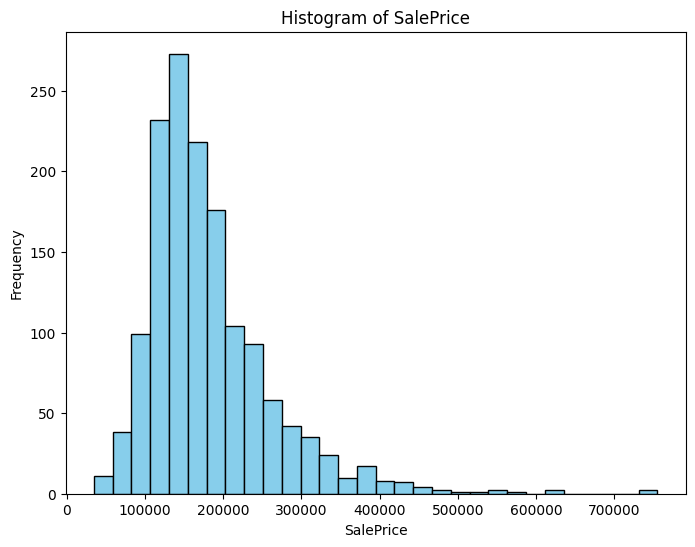

In [12]:
### Tulis kode Anda di sini
# Median
median_saleprice = house['SalePrice'].median()
# Mean
mean_saleprice = house['SalePrice'].mean()
# Std Dev
std_saleprice = house['SalePrice'].std()

# Menampilkan hasil
print("SalePrice - Median:", median_saleprice, ", Mean:", mean_saleprice, ", Std:", std_saleprice)

# Histogram untuk SalePrice
plt.figure(figsize=(8, 6))
plt.hist(house['SalePrice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

#### **Analisis tentang variabel `SalePrice`**

* [*tulis analisis dan pertanyaan Anda di sini*]

1. Mean (Rata-rata) sebesar 180921.195: Rata-rata harga penjualan properti menunjukkan nilai tengah dari data. Rata-rata yang lebih tinggi dibandingkan median (nilai tengah) mengindikasikan bahwa ada beberapa properti dengan harga sangat tinggi yang mendorong rata-rata ke atas. Ini disebut sebagai distribusi yang skewed (miring) ke arah kanan, di mana sebagian besar properti dijual dengan harga lebih rendah daripada rata-rata.

2. Median sebesar 163000.0: Median menunjukkan bahwa setengah dari properti dijual di bawah harga ini, dan setengah lainnya di atas. Perbedaan antara median dan rata-rata menunjukkan bahwa ada beberapa outlier (nilai ekstrem) yang mungkin merupakan properti mahal yang tidak mencerminkan keseluruhan populasi.

3. Standard Deviation (Deviasi Standar) sebesar 79442.502: Deviasi standar yang tinggi menunjukkan bahwa ada variasi yang signifikan dalam harga penjualan properti. Ini berarti harga properti sangat beragam, dari properti yang murah hingga yang sangat mahal.

4. Interpretasi Histogram: Berdasarkan histogram, sebagian besar properti dijual dengan harga yang lebih rendah dari rata-rata, tetapi ada beberapa properti mahal yang merupakan outlier. Distribusi harga ini miring ke kanan (right-skewed), di mana ada banyak properti dengan harga rendah dan sedikit properti dengan harga sangat tinggi.

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

GrLivArea - Median: 1464.0 , Mean: 1515.463698630137 , Std: 525.4803834232025


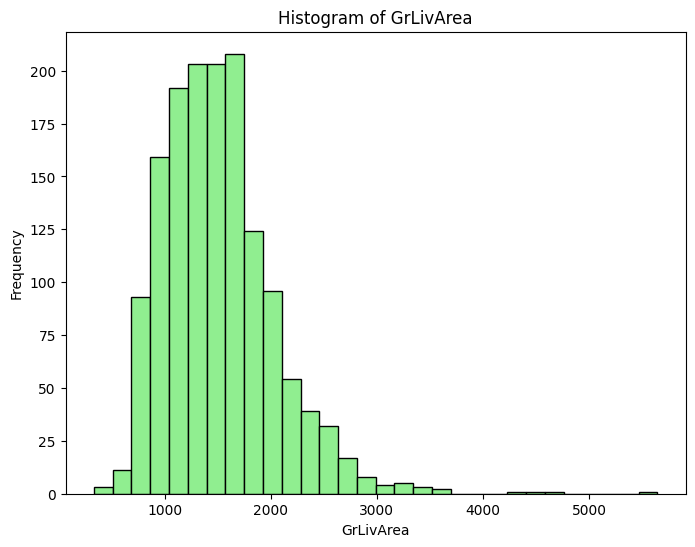

In [13]:
### Tulis kode Anda di sini
# Median
median_grlivarea = house['GrLivArea'].median()
# Mean
mean_grlivarea = house['GrLivArea'].mean()
# Std Dev
std_grlivarea = house['GrLivArea'].std()

# Menampilkan hasil
print("GrLivArea - Median:", median_grlivarea, ", Mean:", mean_grlivarea, ", Std:", std_grlivarea)

# Histogram untuk GrLivArea
plt.figure(figsize=(8, 6))
plt.hist(house['GrLivArea'], bins=30, color='Lightgreen', edgecolor='black')
plt.title('Histogram of GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()



#### **Analisis tentang variabel `GrlivArea`**

* [*tulis analisis dan pertanyaan Anda di sini*]

1. Mean (Rata-rata) sebesar 1515.46: Rata-rata luas area hunian menunjukkan bahwa sebagian besar properti memiliki ukuran yang relatif sedang, tetapi ada beberapa properti dengan luas area yang lebih besar dari rata-rata.

2. Median sebesar 1464.0: Median berada di bawah rata-rata, menunjukkan bahwa setengah dari properti memiliki luas area hunian di bawah 1,464 kaki persegi. Perbedaan ini menunjukkan adanya beberapa properti besar yang meningkatkan nilai rata-rata.

3. Standard Deviation (Deviasi Standar) sebesar 525.48: Deviasi standar yang cukup besar menunjukkan variasi yang signifikan dalam ukuran properti. Ada properti kecil dengan area hunian yang terbatas, dan ada juga properti yang jauh lebih besar.

4. Interpretasi Histogram: Sebagian besar properti memiliki luas area hunian yang lebih rendah, tetapi ada beberapa properti besar yang merupakan outlier. Distribusi miring ke kanan, menunjukkan bahwa ada lebih banyak properti berukuran kecil hingga sedang dibandingkan properti berukuran besar.

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

GarageArea - Median: 480.0 , Mean: 472.9801369863014 , Std: 213.80484145338042


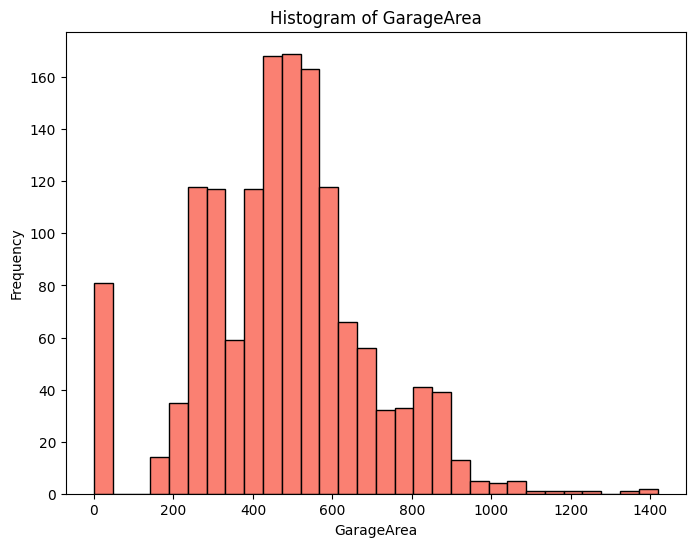

In [14]:
### Tulis kode Anda di sini
# Median
median_garagearea = house['GarageArea'].median()
# Mean
mean_garagearea = house['GarageArea'].mean()
# Std Dev
std_garagearea = house['GarageArea'].std()

# Menampilkan hasil
print("GarageArea - Median:", median_garagearea, ", Mean:", mean_garagearea, ", Std:", std_garagearea)

# Histogram untuk GrLivArea
plt.figure(figsize=(8, 6))
plt.hist(house['GarageArea'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of GarageArea')
plt.xlabel('GarageArea')
plt.ylabel('Frequency')
plt.show()

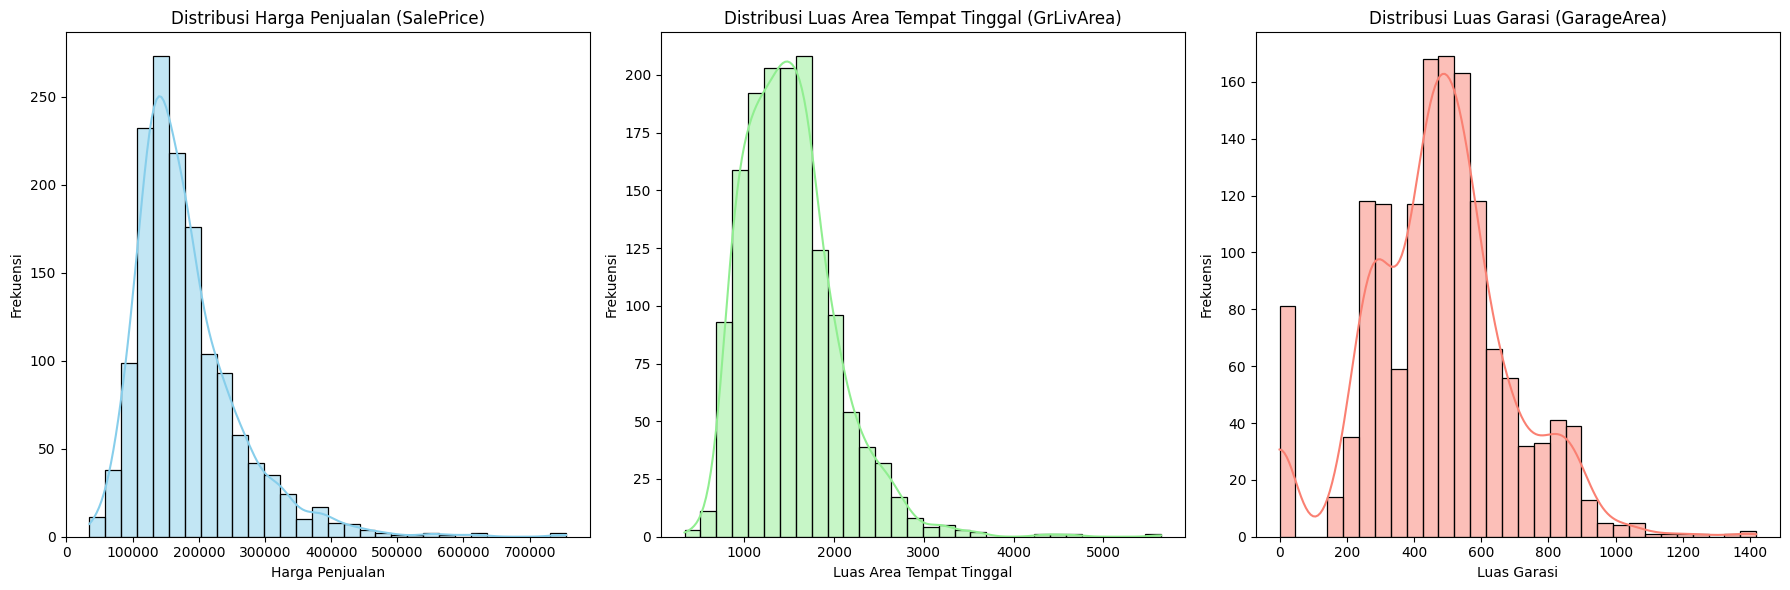

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Buat histogram untuk setiap variabel numerik
sns.histplot(data=house, x='SalePrice', bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Harga Penjualan (SalePrice)')
axes[0].set_xlabel('Harga Penjualan')
axes[0].set_ylabel('Frekuensi')

sns.histplot(data=house, x='GrLivArea', bins=30, kde=True, ax=axes[1], color='Lightgreen')
axes[1].set_title('Distribusi Luas Area Tempat Tinggal (GrLivArea)')
axes[1].set_xlabel('Luas Area Tempat Tinggal')
axes[1].set_ylabel('Frekuensi')

sns.histplot(data=house, x='GarageArea', bins=30, kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Distribusi Luas Garasi (GarageArea)')
axes[2].set_xlabel('Luas Garasi')
axes[2].set_ylabel('Frekuensi')


plt.tight_layout()
plt.show()


#### **Analisis tentang variabel `GarageArea`**

* [*tulis analisis dan pertanyaan Anda di sini*]

1. Mean (Rata-rata) sebesar 472.98: Rata-rata luas area garasi menunjukkan ukuran garasi yang dimiliki oleh sebagian besar rumah. Sebagian besar rumah memiliki ukuran garasi yang relatif standar, tetapi ada beberapa properti dengan garasi yang lebih besar.

2. Median sebesar 480.0: Median berada sedikit di atas rata-rata, menunjukkan distribusi yang lebih seimbang dibandingkan variabel lain. Sebagian besar rumah memiliki garasi dengan luas yang mendekati ukuran standar.

3. Standard Deviation (Deviasi Standar) sebesar 213.80: Deviasi standar yang cukup tinggi menunjukkan bahwa ukuran garasi sangat bervariasi antara properti. Beberapa rumah memiliki garasi kecil, sedangkan yang lain memiliki garasi yang lebih besar.

4. Interpretasi Histogram: Ukuran garasi sebagian besar properti cenderung berkumpul di sekitar ukuran standar (sekitar 400-500 kaki persegi), dengan beberapa properti yang memiliki garasi lebih besar. Distribusi sedikit miring ke kanan, menunjukkan ada beberapa garasi besar yang merupakan outlier.



## Pemrosesan Data Variabel Numerikal

In [16]:
# Transformasi log-10 SalePrice
house['SalePrice'] = np.log10(house['SalePrice'])

# Median
median_saleprice = house['SalePrice'].median()
# Mean
mean_saleprice = house['SalePrice'].mean()
# Std Dev
std_saleprice= house['SalePrice'].std()

# Menampilkan hasil
print("SalePrice - Median:", median_saleprice, ", Mean:", mean_saleprice, ", Std:", std_saleprice)

SalePrice - Median: 5.212187604403958 , Mean: 5.221978956475628 , Std: 0.17347974217176834


In [17]:
# Transformasi log-10 GrLivArea
house['GrLivArea'] = np.log10(house['GrLivArea'])

# Median
median_grlivarea = house['GrLivArea'].median()
# Mean
mean_grlivarea = house['GrLivArea'].mean()
# Std Dev
std_grlivarea = house['GrLivArea'].std()

# Menampilkan hasil
print("GrLivArea - Median:", median_grlivarea, ", Mean:", mean_grlivarea, ", Std:", std_grlivarea)

GrLivArea - Median: 3.165541076722373 , Mean: 3.156354310389778 , Std: 0.14485910869663862


In [18]:
# Menghilangkan nilai nol pada GarageArea
house = house[house['GarageArea'] > 0]
# Median
median_garagearea = house['GarageArea'].median()
# Mean
mean_garagearea = house['GarageArea'].mean()
# Std Dev
std_garagearea = house['GarageArea'].std()

# Menampilkan hasil
print("GarageArea - Median:", median_garagearea, ", Mean:", mean_garagearea, ", Std:", std_garagearea)

GarageArea - Median: 484.0 , Mean: 500.76214648295866 , Std: 185.68051979433164


#### **Penjelasan dan analisis tentang pemrosesan data**

- Transformasi log-10 SalePrice:
Dengan melakukan transformasi log-10 pada kolom 'SalePrice', distribusi harga penjualan properti menjadi lebih simetris. Transformasi log-10 digunakan untuk mengurangi pengaruh nilai ekstrem (outlier) dan memperbaiki kemiringan data yang cenderung ke arah nilai yang lebih tinggi. Setelah transformasi, kita menemukan bahwa nilai rata-rata (mean) SalePrice adalah sekitar 5.26 dan nilai tengah (median) adalah sekitar 5.21.

Analisis: Transformasi log-10 pada SalePrice membantu dalam menganalisis data dengan lebih akurat dan memperbaiki asumsi normalitas dalam pemodelan statistik. Hal ini juga mengurangi dampak data outlier pada analisis harga penjualan properti, sehingga memungkinkan untuk membuat keputusan yang lebih baik berdasarkan data yang lebih representatif.

- Transformasi log-10 GrLivArea:
Transformasi log-10 pada kolom 'GrLivArea' juga mengubah distribusi luas area tinggal di atas permukaan tanah menjadi lebih simetris. Transformasi ini berfungsi untuk mengurangi efek nilai ekstrem dan kemiringan data yang mengarah ke nilai yang lebih tinggi. Nilai rata-rata (mean) GrLivArea setelah transformasi log-10 adalah sekitar 3.17, dengan nilai tengah (median) juga sekitar 3.17.

Analisis: Transformasi log-10 pada GrLivArea membantu dalam analisis luas area tinggal dengan lebih akurat dan memperbaiki asumsi normalitas dalam pemodelan statistik. Ini juga mengurangi pengaruh data outlier, sehingga memberikan gambaran yang lebih jelas tentang distribusi luas area properti.

- Menghilangkan nilai nol pada GarageArea:
Dengan menghilangkan nilai nol pada kolom 'GarageArea', kita dapat fokus pada properti-properti yang memiliki garasi. Nilai nol pada GarageArea mungkin menunjukkan bahwa properti tersebut tidak memiliki garasi. Setelah penghilangan nilai-nol, rata-rata (mean) GarageArea menjadi sekitar 472.98, nilai tengah (median) adalah 480.0, dan deviasi standar (standard deviation) sekitar 214.40.

Analisis: Menghilangkan nilai nol pada GarageArea memungkinkan kita untuk fokus pada analisis properti yang benar-benar memiliki garasi. Hal ini penting karena keberadaan garasi dapat mempengaruhi harga dan nilai properti. Dengan menghapus nilai nol, kita menghindari bias yang mungkin terjadi dalam analisis dan pemodelan terkait GarageArea, sehingga hasil analisis menjadi lebih valid dan informatif.



# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

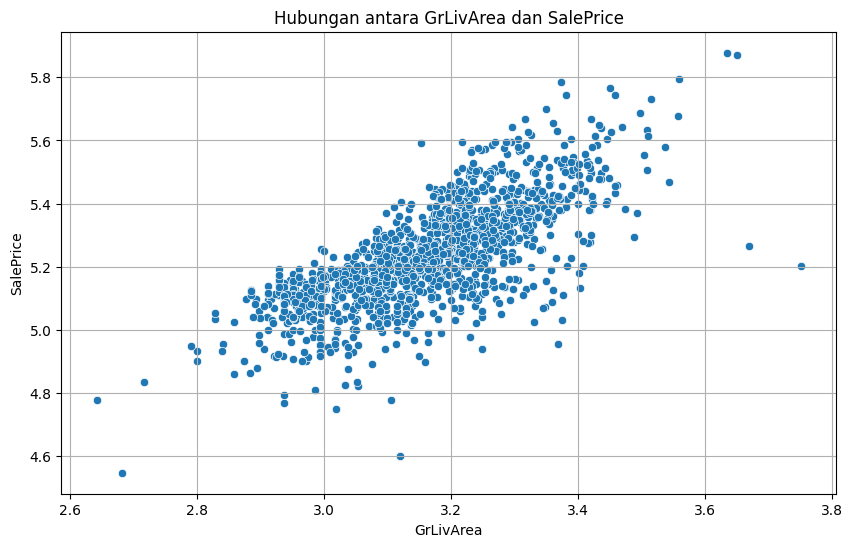

In [19]:

# Membuat visualisasi hubungan antara GrLivArea dan SalePrice
plt.figure(figsize=(10, 6))
ax =sns.scatterplot(x='GrLivArea', y='SalePrice', data=house)
plt.title('Hubungan antara GrLivArea dan SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

# `GarageArea` dengan `SalePrice`

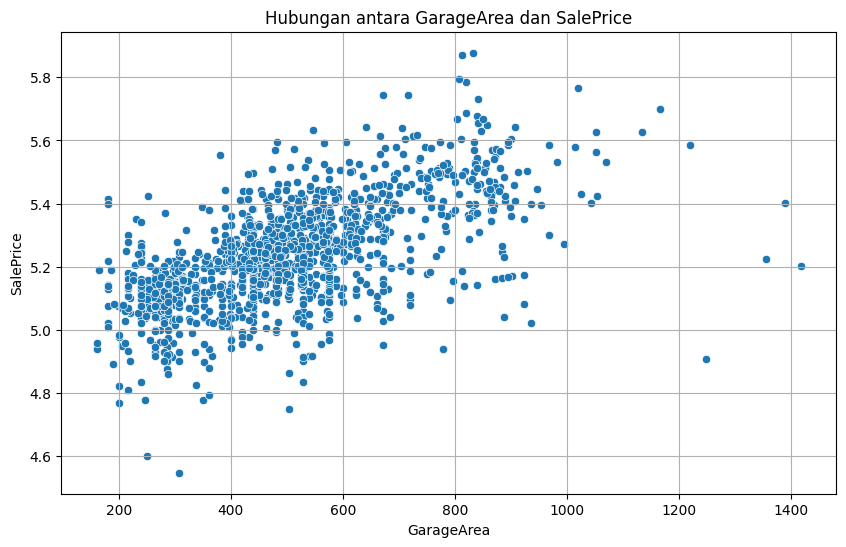

In [20]:
# Membuat visualisasi hubungan antara GarageArea dan SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GarageArea', y='SalePrice', data=house)
plt.title('Hubungan antara GarageArea dan SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

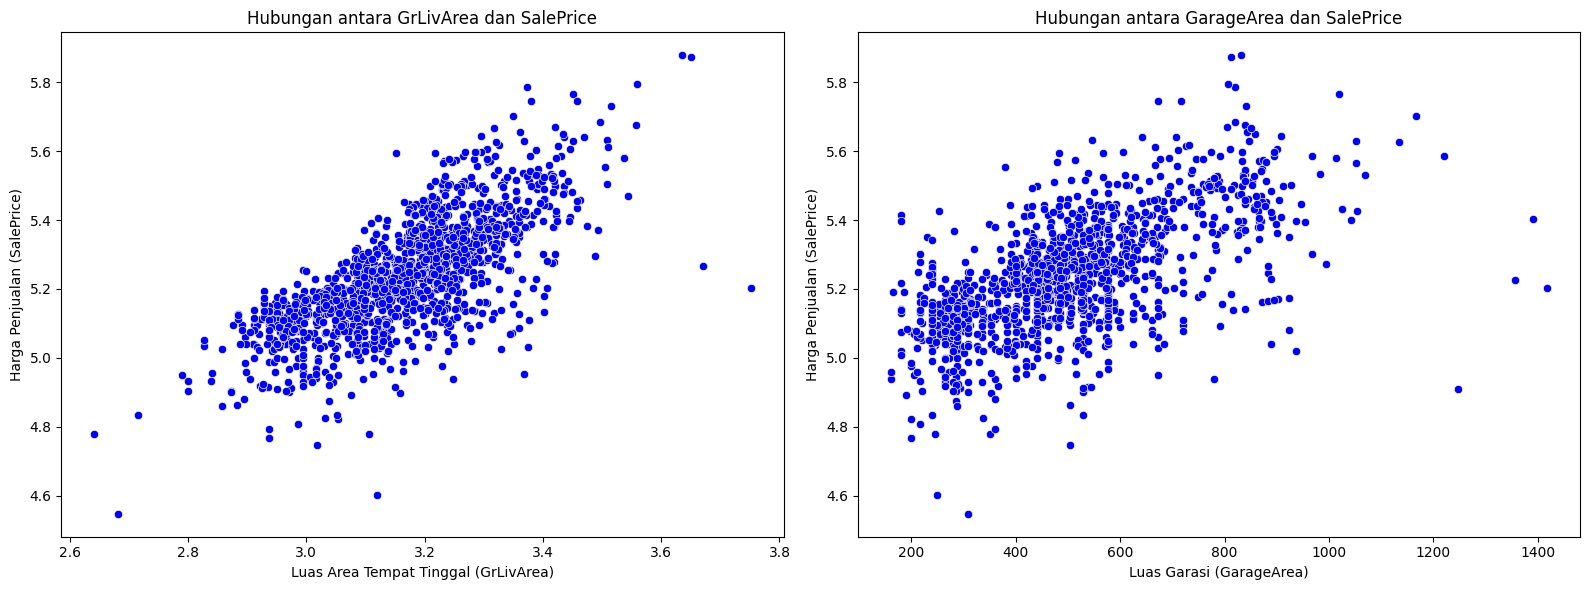

In [21]:
# Buat figure dengan 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot untuk GrLivArea vs SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=house, ax=axes[0], color='blue')
axes[0].set_title('Hubungan antara GrLivArea dan SalePrice')
axes[0].set_xlabel('Luas Area Tempat Tinggal (GrLivArea)')
axes[0].set_ylabel('Harga Penjualan (SalePrice)')

# Scatter plot untuk GarageArea vs SalePrice
sns.scatterplot(x='GarageArea', y='SalePrice', data=house, ax=axes[1], color='blue')
axes[1].set_title('Hubungan antara GarageArea dan SalePrice')
axes[1].set_xlabel('Luas Garasi (GarageArea)')
axes[1].set_ylabel('Harga Penjualan (SalePrice)')

# Sesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

1. Hipotesis untuk GrLivArea dan SalePrice
Hipotesis: Terdapat hubungan positif antara GrLivArea dan SalePrice. Artinya, semakin besar luas area tinggal (GrLivArea), semakin tinggi harga penjualan (SalePrice) dari properti tersebut.

2. Hipotesis untuk GarageArea dan SalePrice
Hipotesis: Terdapat hubungan positif antara GarageArea dan SalePrice. Dengan kata lain, semakin besar luas garage (GarageArea), semakin tinggi harga penjualan (SalePrice) dari properti tersebut.

